In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [97]:
def draw_graph(x_start, x_end):
    # 1000 linearly spaced numbers
    x = np.linspace(x_start,x_end,1000)

    y = 0
    for i in range(1,10):
        kFact = math.factorial(i)
        kFactSq = math.pow(kFact, 2)
        y += np.sin(kFactSq*x) / kFact

    # setting the axes at the centre
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))

    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    ax.title.set_text(f'h(x): a finite Fourier expansion with x in [{x_start},{x_end}]')
    ax.set_xlabel('x')
    ax.set_ylabel('h(x)')
    # plot the function
    plt.plot(x,y, 'b')

    # show the plot
    plt.show()

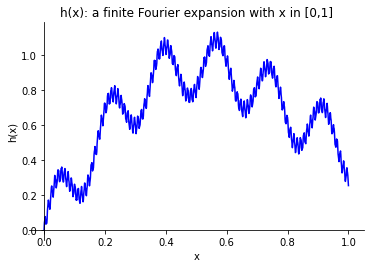

In [98]:
draw_graph(0,1)

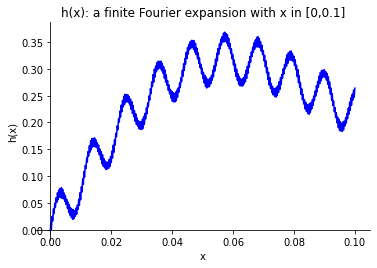

In [99]:
draw_graph(0,0.1)

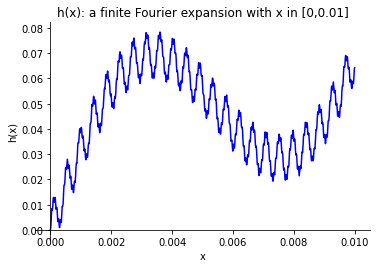

In [100]:
draw_graph(0,0.01)

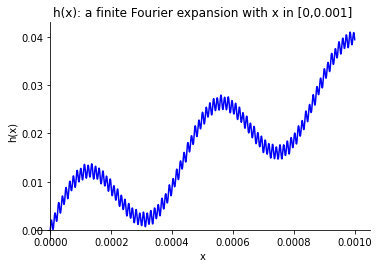

In [101]:
draw_graph(0,0.001)

In [37]:
import scipy.integrate as integrate
import scipy

In [2]:
def integrand(x, k):
    return x*np.sin(k*x)

In [86]:
def draw_Gibbs_graph(x_start, x_end, k_max):
    # 1000 linearly spaced numbers
    x = np.linspace(x_start,x_end,10000)

    y = 0
    for i in range(1,k_max):
        # compute bk by integrating f(x)sin(kx) from -pi to pi and dividing by pi
        integralResult = (1/math.pi)*integrate.quad(integrand, x_start, x_end, args=(i))[0]
        y += integralResult*np.sin(i*x)
        
    # setting the axes at the centre
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))

    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',x_start))

    ax.title.set_text(f'Fourier series of x with {k_max} terms from [-pi,pi]')
    ax.set_xlabel('x')
    ax.set_ylabel('h(x)')
    # plot the function
    plt.plot(x,y, 'b')

    # show the plot
    plt.show()

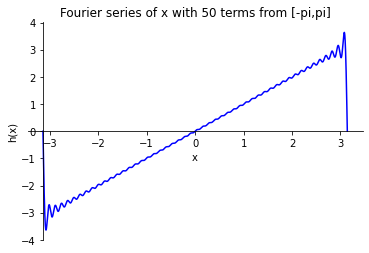

In [115]:
draw_Gibbs_graph(-1*math.pi, math.pi, 50)

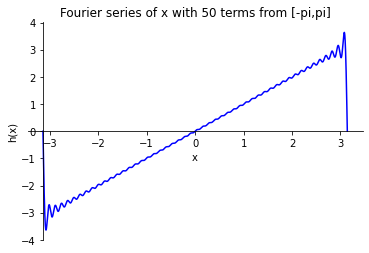

In [70]:
draw_Gibbs_graph(-1*math.pi, math.pi, 50)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  import sys


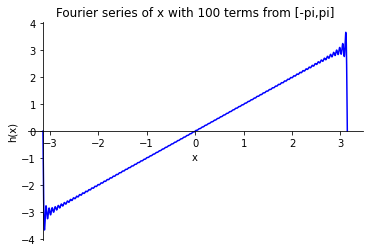

In [71]:
draw_Gibbs_graph(-1*math.pi, math.pi, 100)

In [72]:
def draw_Gibbs_graph_preintegrated(x_start, x_end, k_max):
    # 1000 linearly spaced numbers
    x = np.linspace(x_start,x_end,10000)

    y = 0
    for i in range(1,k_max):
        y += -2*(-1)**i*np.sin(i*x)/i
        

    # setting the axes at the centre
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))

    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',x_start))

    ax.title.set_text(f'Fourier series of x with {k_max} terms from [-pi,pi]')
    ax.set_xlabel('x')
    ax.set_ylabel('h(x)')
    # plot the function
    plt.plot(x,y, 'b')

    # show the plot
    plt.show()

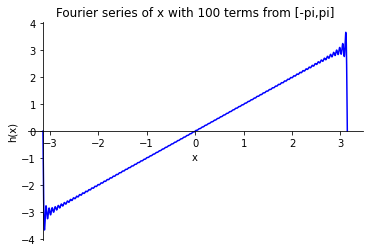

In [73]:
draw_Gibbs_graph_preintegrated(-1*math.pi, math.pi, 100)

In [53]:
def f(x, k_max):
    y = 0
    for i in range(1,k_max):
        y += -2*(-1)**i*np.sin(i*x)/i
    return y

def find_max(n):
    cur_max = 0
    for i in range(1,10000):
        calculation = f(math.pi-1/i, n)
        if calculation > cur_max:
            cur_max = calculation
    return cur_max

In [76]:
print(find_max(10))
print(find_max(50))
print(find_max(100))

3.373245253919213
3.6407449063038495
3.6723178883759737


In [77]:
def f(x, k_max):
    y = 0
    for i in range(1,k_max):
        y += -2*(-1)**i*np.sin(i*x)/i
    return y

# The max occurs at the peak of the smallest term --> find value only at f(pi-pi/n)
# To find percent-distance from desired value for f(x) at pi (= pi), normalize by 1/pi
def find_max_with_foresight(n):
    calculation = f(math.pi-math.pi/n, n)/math.pi
    return calculation

In [79]:
print(find_max_with_foresight(10))
print(find_max_with_foresight(100))
print(find_max_with_foresight(1000))
print(find_max_with_foresight(10000))
print(find_max_with_foresight(100000))
print(find_max_with_foresight(1000000))
print(find_max_with_foresight(10000000))

1.0773120015895146
1.1689630776980096
1.1779795778054905
1.1788797428055
1.1789697444554945
1.1789787444720297
1.1789796444724283


In [80]:
print(1.1789787444720297*math.pi)

3.7038709623718464
